In [1]:
import numpy as np
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as image
import random
import time

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def gen_label(image):
    try:
        label = image.split('.')[-3]
    except:
        label = None
    finally:
        if label == 'cat':
            return [1, 0]
        elif label == 'dog':
            return [0, 1]
        else:
            return [0, 0]

In [82]:
def read_directory(**kwargs):

    for filename in os.listdir(kwargs['directory_name']):
        #if (filename == '')
        label = gen_label(filename)
        img = cv2.imread(kwargs['directory_name'] + "/" + filename)
        if img is None:
            pass
        else:
            kwargs['array_image'].append([img, np.array(label).reshape(1, 2)])

    return np.array(kwargs['array_image'])

In [83]:
def display_one(a, title1 = "Original"):
    plt.imshow(a)
    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.show()

def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121)
    plt.imshow(a)
    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(b)
    plt.title(title2)
    plt.show()

In [84]:
def time_sleep():
    for i in range(5):
        time.sleep(1)
        print('.', end = '')
    print()

In [ ]:
## 1. read datas that each data has three-dimension (height, width, RGB) 
#Global variable
array_of_img = []
test_of_img = []

print('----------------------------')
print('cats train_data loading', end = '')
data = read_directory(array_image = array_of_img, directory_name = 'D:/deep-learning/images/dataset/training_set/cats')
time_sleep()
print('----------------------------')
print('dogs train_data loading', end = '')
datasets = read_directory(array_image = array_of_img, directory_name = 'D:/deep-learning/images/dataset/training_set/dogs')
time_sleep()
print('----------------------------')
print('cats test_data loading', end = '')
test_data = read_directory(array_image = test_of_img, directory_name = 'D:/deep-learning/images/dataset/test_set/cats')
time_sleep()
print('----------------------------')
print('dogs test_data loading', end = '')
test_datasets = read_directory(array_image = test_of_img, directory_name = 'D:/deep-learning/images/dataset/test_set/dogs')
time_sleep()
print('----------------------------')
print('clean memeory space')
#release memory space 
array_of_img.clear()
test_of_img.clear()

----------------------------
cats train_data loading.....
----------------------------
dogs train_data loading

In [7]:
#data = np.reshape(data, (data.shape[0], data[0][0].shape[0], data[0][0].shape[1], data[0][0].shape[2]))

type(data)
print(data.shape)
#print(data[0][0].shape)

(4000, 2)


In [57]:
random.shuffle(datasets)
random.shuffle(test_datasets)
datasets.shape
test_datasets.shape

(2000, 2)

In [58]:
## 3. distribution train, valid and test data
train_image, train_label = (datasets[:6000, 0], datasets[:6000, 1])
valid_image, valid_label = (datasets[6000:, 0], datasets[:6000, 1])
test_image, test_label = (test_datasets[:, 0], test_datasets[:, 1])
print('train_image shape: ',train_image.shape)
print('valid_image shape: ',valid_image.shape)
print('test_image shape: ',test_image.shape)
print('train_label shape: ',train_label.shape)
print('valid_label shape: ',valid_label.shape)
print('test_label shape: ',test_label.shape)

train_image shape:  (6000,)
valid_image shape:  (2000,)
test_image shape:  (2000,)
train_label shape:  (6000,)
valid_label shape:  (6000,)
test_label shape:  (2000,)


In [59]:
datasets = None
test_datasets = None

In [60]:
## 2. resize each data
def processing(data):
    #img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    
    print('The Second Original size', data[1].shape)
    height = 50
    width = 50
    dim = (width, height)
    res_img = []
    for i in range(len(data)):
        res = cv2.resize(data[i], dim, interpolation = cv2.INTER_LINEAR)
        res_img.append(res)
        
    print("The Second Resized size", res_img[1].shape)
    resized = res_img[1]
    display(data[1], resized, 'Originial', 'Resized')
    return np.array(res_img)

The Second Original size (499, 489, 3)
The Second Resized size (50, 50, 3)


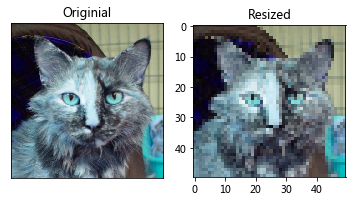

The Second Original size (120, 161, 3)
The Second Resized size (50, 50, 3)


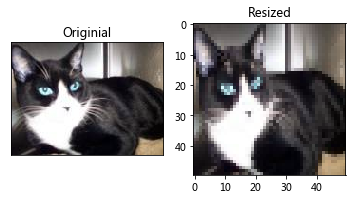

The Second Original size (415, 498, 3)
The Second Resized size (50, 50, 3)


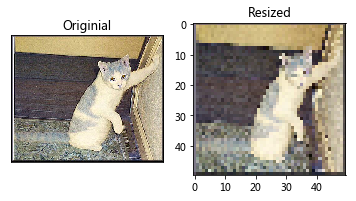

In [61]:
train_image = processing(train_image)
valid_image = processing(valid_image)
test_image = processing(test_image)

In [81]:
print('train_image shape: ', train_image.shape)
print('train_label shape: ', train_label.shape)
print('train_label the first shape: ', train_label[0].shape)
print('train_label the first content: ', train_label[0])

train_image shape:  (6000, 50, 50, 3)
train_label shape:  (6000,)
train_label the first shape:  (2,)
train_label the first content:  [1 0]


In [63]:
## 4. initial variable
weights = None
biases = None
n_images = [50, 50, 3]
n_labels = [1, 2]
learning_rate = 1e-3
graph = tf.Graph()
sess = tf.Session(graph = graph)

In [73]:
## 5. initial Graph structure
with graph.as_default():
    train_images = tf.placeholder(tf.float32, [None] + n_images)
    train_labels = tf.placeholder(tf.float32, [None, n_labels])
    
    weights, biases, _y, loss = structure(images = train_images,
                                          labels = train_labels,
                                          weights = weights,
                                          biases = biases)
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    new_images = tf.placeholder(tf.float32, [None] + n_images)
    new_labels = tf.placeholder(tf.float32, [None, n_labels])
    weights, biases, new_y, new_loss = structure(images = new_images,
                                                 labels = new_labels,
                                                 weights = weights,
                                                 biases = biases)
    init_op = tf.global_variables_initializer()

n : 50
n : 2500
n : 7500
n : 50
n : 2500
n : 7500


In [65]:
def structure(images, labels, weights, biases):
    if (weights is None) or (biases is None):
        weights = {
            'fc1' : tf.Variable(tf.truncated_normal([50*50*3, n_labels]))
        }
        biases = {
            'fc1' : tf.Variable(tf.zeros([n_labels], dtype = tf.float32))    
        }
    flatten = get_flatten_layer(images)
    logits = get_dense_layer(images = flatten,
                             weight = weights['fc1'],
                             bias = biases['fc1'])
    _y = tf.nn.softmax(logits)
    
    loss = tf.nn.softmax_cross_entropy_with_logits(labels = labels, logits = logits)
    
    return (weights, biases, _y, loss)

In [66]:
def get_dense_layer(images, weight, bias, activation = None):
    x = tf.add(tf.matmul(images, weight), bias)
    if activation:
        x = activation(x)
    return x

In [67]:
def get_flatten_layer(input_layer):
    shape = input_layer.get_shape().as_list() #only tensor can used
    n = 1
    for s in shape[1:]:
        n = n * s
        print('n :', n)
    x = tf.reshape(input_layer, [-1, n])
    return x

In [68]:
def _check_array(ndarray):
    ndarray = np.array(ndarray)
    if len(ndarray) == 1:
        ndarray = np.reshape(ndarray, (1, ndarray))
    return ndarray

In [69]:
def predict(X, y):
    X = _check_array(X)
    y = _check_array(y)
    
    feed_dict = {
         new_images : X,
         new_labels : y
    }
    return sess.run(new_y, feed_dict = feed_dict)

In [70]:
def evaluate(X, y):
    feed_dict = {
        new_images : X,
        new_labels : y
    }
    return (new_loss, feed_dict)

In [71]:
def accuracy(prediction, labels):
    return np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions[0]

In [79]:
def fit(X, y, epochs = 10, learning_rate = 1e-3, valid_data = None, test_data = None):
    X = _check_array(X)
    y = _check_array(y)
    
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    val_loss_list = []
    val_acc_list = []
    sess.run(init_op)
    for epoch in range(epochs):
        print('Epoch %2d/%2d: ' % (epoch + 1, epochs))
        
        feed_dict = {
            train_images : X,
            train_labels : y
        }
        sess.run(train_op, feed_dict = feed_dict)
        Y = predict(X)
        train_loss = evaluate(X, y)
        train_acc = accuracy(Y, y)
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        print('train loss %8.4f, train acc %3.2f%%' % (train_loss, train_acc * 100), end = '')
        
        if valid_data is not None:
            val_Y = prediction(valid_data[0])
            val_loss = evaluate(valid_data[0], valid_data[1])
            val_acc = accuracy(val_Y, valid_data[1])
            val_loss_list.append(val_loss)
            val_acc_list.append(val_acc)
            print('val loss %8.4f, val acc %3.2f%%' % (val_loss, val_acc * 100))
            
        if test_data is not None:
            test_Y = prediction(test_data[0])
            test_acc = accuracy(test_Y, test_data[1])
            print('test acc %3.2f%%' % (test_acc * 100))
    
    ans = {
        'train_loss' : train_loss_list,
        'train_acc' : train_acc_list,
        'val_loss' : val_loss_list,
        'val_acc' : val_acc_list,
        'test_acc' : test_acc_list
    }
    
    return ans

In [80]:
dic_ans = fit(X = train_image,
              y = train_label,
              epochs = 10,
              valid_data = (valid_image, valid_label),
              test_data = (test_image, test_label))

Epoch  1/10: 


ValueError: setting an array element with a sequence.

In [78]:
test_label[0]

array([1, 0])

In [2]:
%who_ls

['gc']

In [1]:
import gc

In [ ]:
gc.collect()